In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# init_notebook_mode(connected=True)

init_notebook_mode(connected=True)

In [2]:
%cd '/content/drive/MyDrive/CodeClause Internship/Stock Market Prediction'
%ls

/content/drive/MyDrive/CodeClause Internship/Stock Market Prediction
'Stock Market Prediction.ipynb'   tesla.csv


In [3]:
tesla = pd.read_csv('tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [6]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [7]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


In [8]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

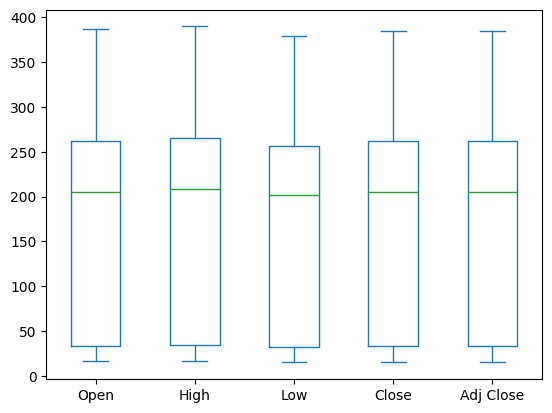

In [9]:
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind="box")

In [11]:
# Setting the Layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#7f7f7f"
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#7f7f7f"
        )
    )
)

tesla_data = [{'x': tesla['Date'], 'y': tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [12]:
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Plotting offline
# plot(plot)
# iplot(plot)

# Building the regression model

# Preprocessing
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X = np.array(tesla.index).reshape(-1, 1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Feature scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Linear model
lm = LinearRegression()
lm.fit(X_train_scaled, Y_train)

# Plot actual and predicted values for the train dataset
trace_actual = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace_predicted = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train_scaled),
    mode = 'lines',
    name = 'Predicted'
)

tesla_data = [trace_actual, trace_predicted]
layout = go.Layout(
    title='Actual vs. Predicted Values for Train Dataset',
    xaxis=dict(
        title='Day'
    )
)
plot2 = go.Figure(data=tesla_data, layout=layout)
iplot(plot2)

# Calculate scores for model evaluation
train_r2_score = r2_score(Y_train, lm.predict(X_train_scaled))
test_r2_score = r2_score(Y_test, lm.predict(X_test_scaled))
train_mse = mse(Y_train, lm.predict(X_train_scaled))
test_mse = mse(Y_test, lm.predict(X_test_scaled))

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{train_r2_score}\t{test_r2_score}
{'MSE'.ljust(10)}{train_mse}\t{test_mse}'''
print(scores)


Metric           Train                Test        
r2_score  0.8660803186723284	0.8608225208953693
MSE       1782.0225212261892	1871.4933798013767
